In [9]:
import pandas as pd

csv_file_path = os.path.join(extract_dir, 'creditcard.csv')
df = pd.read_csv(csv_file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 1081


In [21]:
dataset = df.drop_duplicates()

In [23]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Step 1: Load and Preprocess Data
# Check for missing values (this should return False if there are no missing values)
print(df.isnull().sum().any())

# Separate the features and the target variable (Class)
X = df.drop(columns=['Class'])
y = df['Class']

# Standardize the 'Amount' and 'Time' columns since these are not PCA-transformed
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the training and testing data
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


False
Training set shape: (227845, 30), Test set shape: (56962, 30)


In [29]:
dataset.isnull().values.any()

False

In [6]:
import pandas as pd

# Provide the correct path to your ZIP file
dataset_path = r'C:\Users\AYUSH\Downloads\creditcard.csv.zip'  # Update this path

# Load the CSV file from within the ZIP archive
try:
    data = pd.read_csv(dataset_path, compression='zip')  # Add 'compression' argument
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found. Please check the path: {dataset_path}")
except OSError as e:
    print(f"An OS error occurred: {e}")


Dataset loaded successfully.


File extracted successfully.
Dataset loaded successfully.


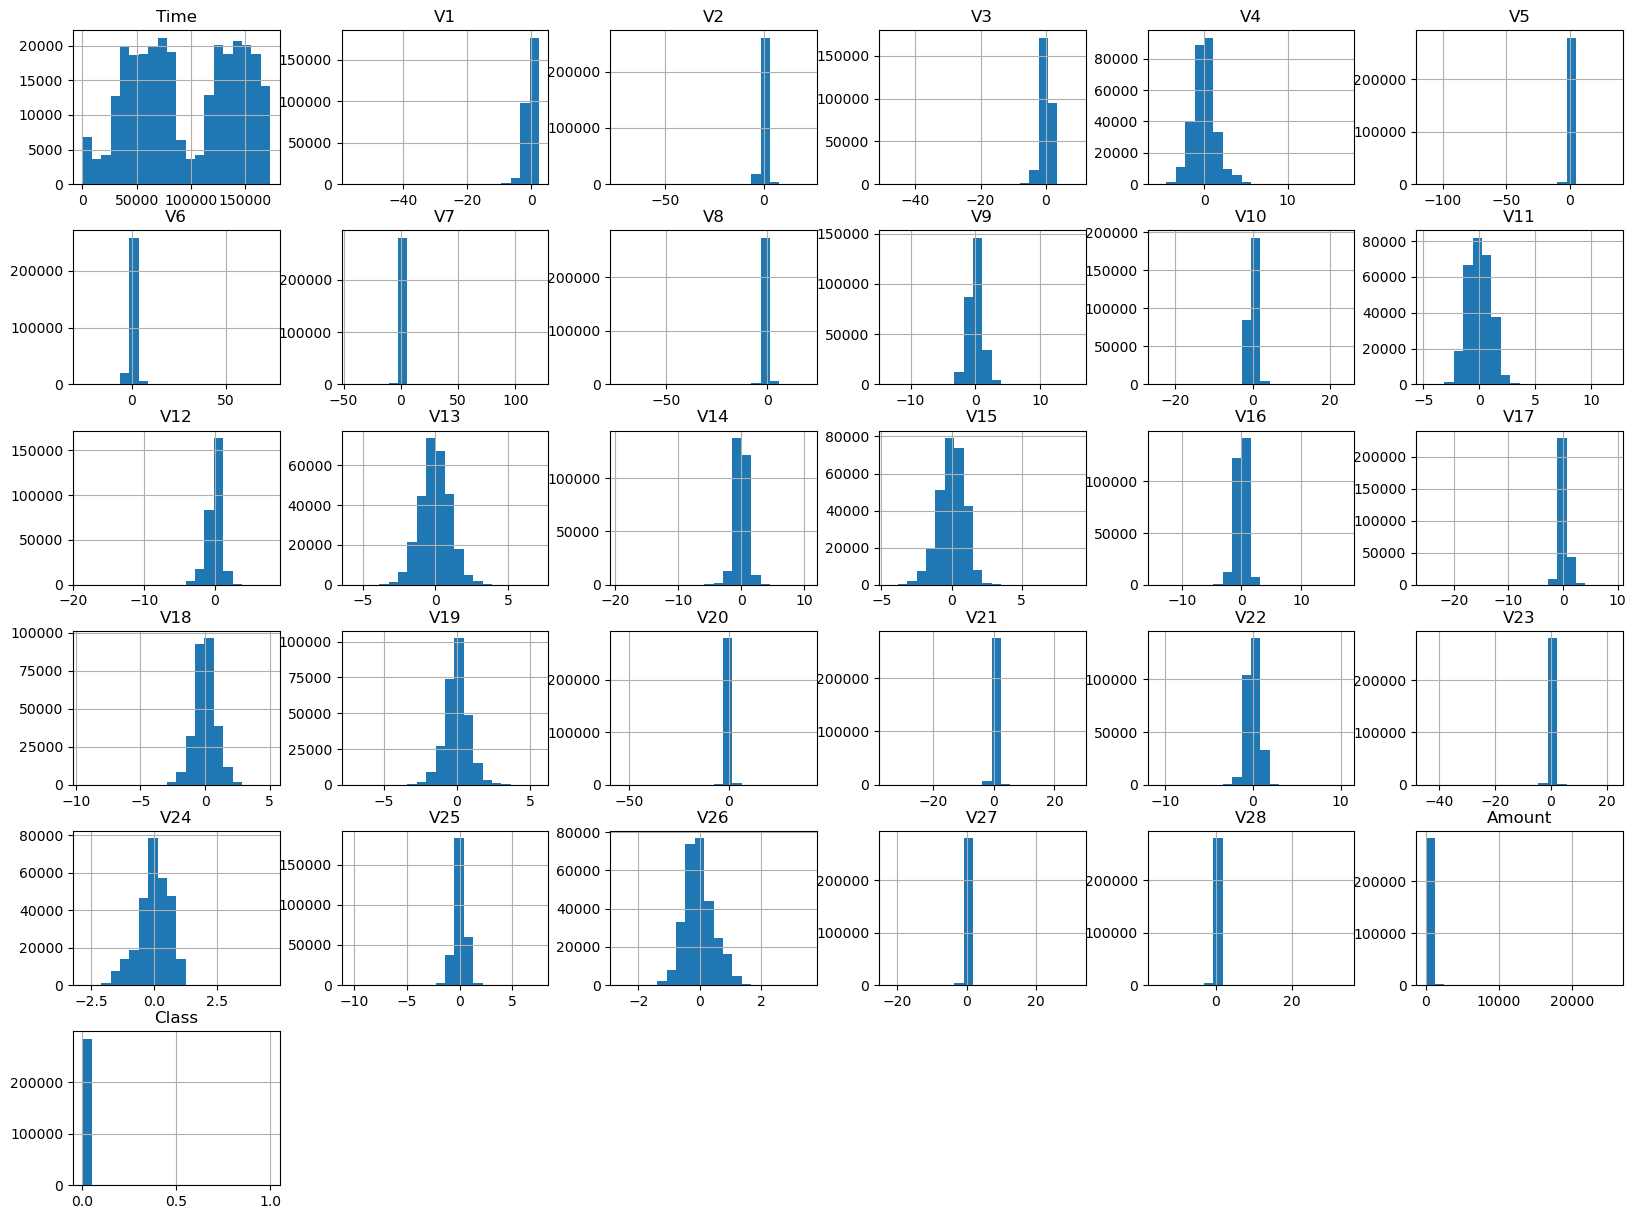

Training set: (199364, 30), Test set: (85443, 30)
Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    199008
           1       0.10      0.56      0.17       356

    accuracy                           0.99    199364
   macro avg       0.55      0.77      0.58    199364
weighted avg       1.00      0.99      0.99    199364

Confusion Matrix (Train Set):
[[197213   1795]
 [   157    199]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.10      0.60      0.17       136

    accuracy                           0.99     85443
   macro avg       0.55      0.80      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix (Test Set):
[[84547   760]
 [   54    82]]

ROC AUC Score (Test Set): 0.80


In [14]:
# Import necessary libraries
# Step 2: Train and Evaluate the Isolation Forest (implementing a classical fraud detection model as a benchmark.)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, copy, warnings
import zipfile
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

warnings.filterwarnings('ignore')

# Provide the correct path to your 'creditcard.csv.zip' file
dataset_path = r"C:\Users\AYUSH\Downloads\creditcard.csv.zip"  # Correct path

# Extract and load the dataset from the ZIP file
with zipfile.ZipFile(dataset_path, 'r') as z:
    z.extractall("extracted_data")  # Extract to a folder
    print("File extracted successfully.")

# Define the path to the extracted CSV file
csv_path = os.path.join("extracted_data", "creditcard.csv")

# Load the dataset
try:
    data = pd.read_csv(csv_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found. Please check the path: {csv_path}")
    exit()

# Display histogram of the dataset
data.hist(bins=20, figsize=(20, 15))
plt.show()

# Separate the dataset into features and labels
X = data.drop('Class', axis=1).values  # All columns except 'Class'
y = data['Class'].values  # 'Class' column as labels

# Scale features to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Train an Isolation Forest model
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(X_train)

# Make predictions (use decision_function to determine anomaly scores)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Map predictions: -1 -> 1 (fraud), 1 -> 0 (normal)
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

# Evaluate the model
print("Classification Report (Train Set):")
print(classification_report(y_train, y_pred_train))

print("Confusion Matrix (Train Set):")
print(confusion_matrix(y_train, y_pred_train))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))

# Calculate ROC AUC score for the test set
roc_auc = roc_auc_score(y_test, y_pred_test)
print(f"\nROC AUC Score (Test Set): {roc_auc:.2f}")


In [16]:
import os

# Check if the file exists
if os.path.exists(dataset_path):
    print("File exists.")
else:
    print("File not found. Please verify the path.")

# Proceed with loading the data if the file exists
try:
    data = pd.read_csv(dataset_path, compression='zip')
    print("Dataset loaded successfully.")
except OSError as e:
    print(f"An OS error occurred: {e}")


File exists.
Dataset loaded successfully.


In [40]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train an Isolation Forest model
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(X_train)

# Make predictions (use decision_function to determine anomaly scores)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Convert the predictions (-1 for anomalies, 1 for non-anomalies) to binary (0, 1)
y_pred_train = [1 if p == -1 else 0 for p in y_pred_train]
y_pred_test = [1 if p == -1 else 0 for p in y_pred_test]

# Evaluate the perfo
rmance on the test data
print("Classification Report (Classical Model):")
print(classification_report(y_test, y_pred_test))


Classification Report (Classical Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.66      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.83      0.59     56962
weighted avg       1.00      0.99      0.99     56962



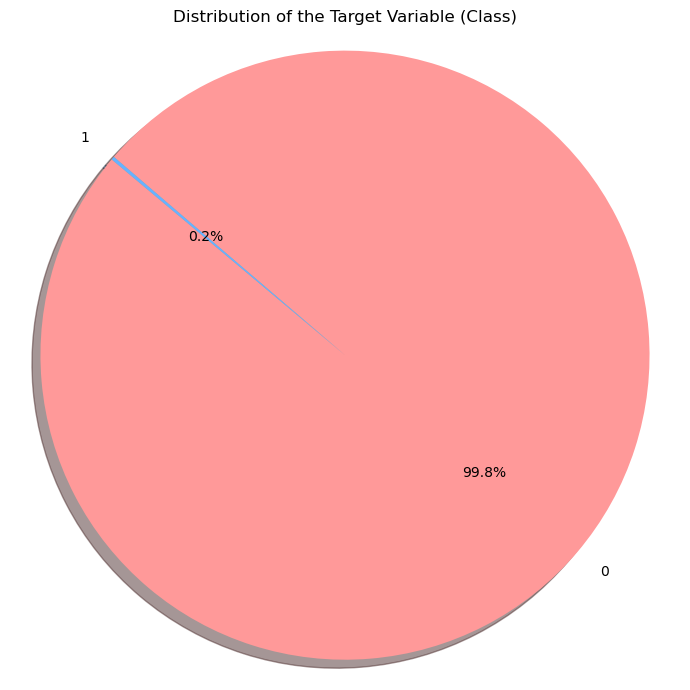

In [20]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt

#Load the dataset and preprocess it as we have done in the previous steps.
#Create a pie chart that shows the distribution of the target variable (Class), which typically indicates whether a transaction is fraudulent (1) or not (0).
zip_file_path = r"C:\Users\AYUSH\Downloads\creditcard.csv.zip"
extract_dir = r"C:\Users\AYUSH\Downloads\extracted_data"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Load the CSV file into a DataFrame
csv_file_path = os.path.join(extract_dir, 'creditcard.csv')
df = pd.read_csv(csv_file_path)

# Step 3: Preprocess (if needed) and visualize the 'Class' distribution
# Check the distribution of the 'Class' column
status_counts = df['Class'].value_counts()

# Define colors for the pie chart (optional, you can customize it)
palette = ['#ff9999','#66b3ff']

# Create the pie chart for the 'Class' distribution
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=palette, shadow=True)

plt.title('Distribution of the Target Variable (Class)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the chart
plt.tight_layout()
plt.show()


In [3]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap

# Example: Using Aer simulator backend
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend)


# Set up the quantum instance (using a simulator here)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=42, seed_transpiler=42)


ImportError: cannot import name 'Aer' from 'qiskit' (C:\Users\AYUSH\AppData\Roaming\Python\Python312\site-packages\qiskit\__init__.py)

In [7]:
# Define the feature map (with 2 layers for this example)
# step 3 Quantum Feature Mapping
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)

# Define the Quantum Kernel (which uses the feature map)
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)


NameError: name 'ZZFeatureMap' is not defined

In [1]:
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
print("Qiskit and ZZFeatureMap imported successfully.")


ImportError: cannot import name 'Aer' from 'qiskit' (C:\Users\AYUSH\AppData\Roaming\Python\Python312\site-packages\qiskit\__init__.py)

In [20]:
# Train the QSVM model using the quantum kernel
qsvm = QSVM(quantum_kernel=quantum_kernel)
qsvm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_quantum = qsvm.predict(X_test)

# Evaluate the quantum model
print("Classification Report (Quantum Model):")
print(classification_report(y_test, y_pred_quantum))


NameError: name 'QSVM' is not defined

In [ ]:
# Classical Model Evaluation
print("Classical Model Evaluation")
print(f"Accuracy (Classical): {accuracy_score(y_test, y_pred_test)}")
print(f"Confusion Matrix (Classical):\n{confusion_matrix(y_test, y_pred_test)}")

# Quantum Model Evaluation
print("Quantum Model Evaluation")
print(f"Accuracy (Quantum): {accuracy_score(y_test, y_pred_quantum)}")
print(f"Confusion Matrix (Quantum):\n{confusion_matrix(y_test, y_pred_quantum)}")
